In [3]:
import jieba
import pandas as pd
import warnings
import numpy as np
import struct
import os
import operator
import collections
from pandas import DataFrame
from wordcloud import WordCloud
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_excel(r'C:\\Users\\X1\\Desktop\\govdata(1).xlsx')

In [5]:
data
#len(data)
#data[['标题']]   返回数据框

,序号,正文,标题,年份,月份,日期1,日期,是否为国务院新闻,url
0,1,习近平对全军后勤工作会议作出重要指示强调\n加快推动现代后勤高质量发展\n为实现建军一百年奋...,习近平对全军后勤工作会议作出重要指示_滚动新闻_中国政府网,2021,11,20211123,2021-11-23 18:35,NaN,http://www.gov.cn/xinwen/2021-11/23/content_56...
1,2,国务院关于“十四五”对外贸易高质量发展规划的批复国函〔2021〕112号\n各省、自治区、直...,国务院关于“十四五”对外贸易高质量发展规划的批复（国函〔2021〕112号）_政府信息公开专栏,2021,11,20211123,2021年11月23日,NaN,http://www.gov.cn/zhengce/content/2021-11/23/c...
2,3,近日，国家发展改革委等6部门联合印发《关于进一步健全社会救助和保障标准与物价上涨挂钩联动机制...,织牢基本民生兜底保障网_解读_中国政府网,2021,11,20211123,2021-11-23 09:40,NaN,http://www.gov.cn/zhengce/2021-11/23/content_5...
3,4,前三季度全国新增减税降费9101亿元——超九成企业对减负政策满意“今年前三季度，全国新增减税...,前三季度全国新增减税降费9101亿元_滚动新闻_中国政府网,2021,11,20211123,2021-11-23 09:37,NaN,http://www.gov.cn/xinwen/2021-11/23/content_56...
4,5,新华社酒泉11月23日电（李国利、奉青玲）11月23日7时45分，我国在酒泉卫星发射中心用长...,我国成功发射高分三号02星_滚动新闻_中国政府网,2021,11,20211123,2021-11-23 09:00,NaN,http://www.gov.cn/xinwen/2021-11/23/content_56...
...,...,...,...,...,...,...,...,...,...
32786,32976,\n\n李克强总理4日在太原市小北关棚户区考察。从78岁老太太李反玉家低矮破败的平房出来后，...,李克强在棚户区对随行部长动情地说：<br>中国要做的事还多着呢！,2016,1,20160104,2016-01-04 00:00:00,NaN,http://www.gov.cn/guowuyuan/2016-01/04/content...
32787,32977,李克强总理4日在太原市小北关棚户区考察。他对这里的居民说：“我自己就是在棚户区成长起来的，深...,李克强对棚户区居民处境感同身受：<br>我自己就是在棚户区成长起来的,2016,1,20160104,2016-01-04 00:00:00,NaN,http://www.gov.cn/guowuyuan/2016-01/04/content...
32788,32978,\n\n李克强总理4日考察太原钢铁集团。太钢集团是全球最大的不锈钢企业，目前遇到很大下行压力...,李克强：好钢要千锤百炼，好产能要优胜劣汰,2016,1,20160104,2016-01-04 00:00:00,NaN,http://www.gov.cn/guowuyuan/2016-01/04/content...
32789,32979,\n“我们多数人都当过农民，吃过农民的饭，即便不是，祖上也应该是农民。我们应该带着感情为农民...,国务院这一年 | 支持“三农”，国务院出8大实招,2016,1,20160103,2016-01-03 00:00:00,NaN,http://www.gov.cn/xinwen/2016-01/03/content_50...


In [74]:
#新闻的时间分布特点
#时间统计
date=data['日期1']
time={}
for i in range(len(date)):
    t=date[i]
    if t not in time:
        time[t]=1
    else:
        time[t]=time[t]+1

In [75]:
time_sorted=sorted(time.items(),key=operator.itemgetter(1),reverse=True)
time_sorted

[(20191105, 51),
 (20190305, 50),
 (20180305, 47),
 (20210305, 46),
 (20200908, 46),
 (20190927, 40),
 (20180905, 40),
 (20170315, 40),
 (20211025, 39),
 (20190929, 39),
 (20190426, 39),
 (20180919, 39),
 (20190925, 38),
 (20190515, 38),
 (20180927, 38),
 (20180906, 38),
 (20180929, 37),
 (20161106, 37),
 (20180912, 36),
 (20170323, 36),
 (20200522, 35),
 (20190425, 35),
 (20180928, 35),
 (20180706, 35),
 (20170305, 35),
 (20160921, 35),
 (20210701, 34),
 (20190428, 34),
 (20190104, 34),
 (20181129, 34),
 (20180901, 34),
 (20161103, 34),
 (20190202, 33),
 (20181130, 33),
 (20181026, 33),
 (20170629, 33),
 (20200117, 32),
 (20190716, 32),
 (20190606, 32),
 (20181112, 32),
 (20181025, 32),
 (20180522, 32),
 (20210422, 31),
 (20210420, 31),
 (20201014, 31),
 (20191009, 31),
 (20190731, 31),
 (20190613, 31),
 (20190423, 31),
 (20181217, 31),
 (20181017, 31),
 (20180926, 31),
 (20180511, 31),
 (20161121, 31),
 (20210706, 30),
 (20211014, 30),
 (20210225, 30),
 (20201104, 30),
 (20190514, 30

In [8]:
title=list(data['标题'])   #返回列表
text=list(data['正文'])

In [9]:
title_cut=[]
for i in range(len(title)):
    a=jieba.lcut(title[i],cut_all=False)
    title_cut.append(a)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\X1\AppData\Local\Temp\jieba.cache
Loading model cost 0.843 seconds.
Prefix dict has been built successfully.


In [10]:
text_cut=[]
for i in range(len(text)):
    a=jieba.lcut(text[i],cut_all=False)
    text_cut.append(a)

In [11]:
#text_cut[0]
#title_cut
len(text_cut)

32791

In [12]:
dic = {"标题": pd.Series(title), 
       "标题分词结果": pd.Series(title_cut)}
c = pd.DataFrame(dic)
#c

进行强化学习

In [1]:
#添加自定义词典
dict1=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\财经金融词汇大全.txt')
dict2=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\法律词汇大全.txt')
dict3=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\经济理论一般名词.txt')
dict4=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\军事词汇大全.txt')
dict5=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\法律词汇大全.txt')
dict6=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\科技创新.txt')
dict7=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\联合国及主要国际组织.txt')
dict8=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\商业经济基础理论与知识.txt')
dict9=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\全国省市区县地名大全.txt')
dict10=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\税务用词.txt')
dict11=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\外贸词汇大全.txt')
dict12=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\新能源行业词.txt')
dict13=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\政府机关团体机构大全.txt')
dict14=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\住房公积金.txt')
dict15=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\国际贸易名词.txt')
dict16=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\商务人员专用词库.txt')
dict17=jieba.load_userdict(r'C:\\Users\\X1\\Desktop\\预处理&分词\\朱同尘_分词代码\\分词词典\\十九大.txt')

NameError: name 'jieba' is not defined

In [14]:
#添加自定义词典后分词
title_cut_learn=[]
for i in range(len(title)):
    a=jieba.lcut(title[i],cut_all=False)
    title_cut_learn.append(a)

In [185]:
#title_cut_learn

In [15]:
text_cut_learn=[]
for i in range(len(text)):
    a=jieba.lcut(text[i],cut_all=False)
    text_cut_learn.append(a)

In [16]:
len(text_cut_learn)

32791

In [17]:
#读取停用词表
stopwords_path = r"C:\Users\X1\Downloads\stop_words.txt"
stop_list = []
with open(stopwords_path, "r") as f:
    for line in f.readlines():
        stop_list.append(line.replace("\n", ""))

In [226]:
#stop_list

In [18]:
#补充的停用词
stopwords=[' ','_','网','滚动','br','—','年','”','“','中','月','\r\n','）','的','<','个','\n','亿元','万亿元','nbsp','届','—','新','个',
           '1']

In [61]:
stop_list=stopwords+stop_list
#stop_list

In [62]:
#去除停用词和纯数字
for i in range(len(title_cut_learn)):
    l=title_cut_learn[i]
    for word in l:
        if word in stop_list or word.isdigit() or len(word)<=1:
            title_cut_learn[i].remove(word)
            
for i in range(len(text_cut_learn)):
    l=text_cut_learn[i]
    for word in l:
        if word in stop_list or word.isdigit() or len(word)<=1:
            text_cut_learn[i].remove(word)

In [376]:
#text_cut[1]

In [377]:
#text_cut_learn[1]

In [39]:
#将最后分词结果输出为dataframe格式进行对比分析
dic1 = {"标题": pd.Series(title), 
       "标题分词结果": pd.Series(title_cut),
       "强化学习后标题分词结果":pd.Series(title_cut_learn),
       "正文":pd.Series(text),
       "正文分词结果":pd.Series(text_cut),
       "强化学习后正文分词结果":pd.Series(text_cut_learn)}
fenci = pd.DataFrame(dic1)
fenci

,标题,标题分词结果,强化学习后标题分词结果,正文,正文分词结果,强化学习后正文分词结果
0,习近平对全军后勤工作会议作出重要指示_滚动新闻_中国政府网,"[习近平, 对, 全军, 后勤工作, 会议, 作出, 重要, 指示, _, 滚动, 新闻, ...","[习近平, 全军, 后勤工作, 会议, 作出, 重要, 指示, _]",习近平对全军后勤工作会议作出重要指示强调\n加快推动现代后勤高质量发展\n为实现建军一百年奋...,"[习近平, 对, 全军, 后勤工作, 会议, 作出, 重要, 指示, 强调, \n, 加快,...","[习近平, 全军, 后勤工作, 会议, 作出, 重要, 指示, 强调, 加快, 推动, 现代..."
1,国务院关于“十四五”对外贸易高质量发展规划的批复（国函〔2021〕112号）_政府信息公开专栏,"[国务院, 关于, “, 十四五, ”, 对外贸易, 高质量, 发展, 规划, 的, 批复,...","[国务院, 十四五, 对外贸易, 高质量, 发展规划, 批复, 2021, ）, 公开]",国务院关于“十四五”对外贸易高质量发展规划的批复国函〔2021〕112号\n各省、自治区、直...,"[国务院, 关于, “, 十四五, ”, 对外贸易, 高质量, 发展, 规划, 的, 批复,...","[国务院, 十四五, 对外贸易, 高质量, 发展规划, 批复, 〕, 各省, 自治区, 直辖..."
2,织牢基本民生兜底保障网_解读_中国政府网,"[织牢, 基本, 民生, 兜底, 保障, 网, _, 解读, _, 中国政府, 网]","[织牢, 民生, 兜底, 保障, 解读, 中国政府]",近日，国家发展改革委等6部门联合印发《关于进一步健全社会救助和保障标准与物价上涨挂钩联动机制...,"[近日, ，, 国家, 发展, 改革, 委等, 6, 部门, 联合, 印发, 《, 关于, ...","[近日, 国家, 发展, 改革, 委等, 部门, 联合, 印发, 进一步, 健全, 社会, ..."
3,前三季度全国新增减税降费9101亿元_滚动新闻_中国政府网,"[前, 三季度, 全国, 新增, 减税, 降费, 9101, 亿元, _, 滚动, 新闻, ...","[三季度, 全国, 新增, 减税, 降费, 滚动, 网]",前三季度全国新增减税降费9101亿元——超九成企业对减负政策满意“今年前三季度，全国新增减税...,"[前, 三季度, 全国, 新增, 减税, 降费, 9101, 亿元, —, —, 超, 九成...","[三季度, 全国, 新增, 减税, 降费, 九成, 企业, 减负, 政策, 满意, 今年, ..."
4,我国成功发射高分三号02星_滚动新闻_中国政府网,"[我国, 成功, 发射, 高分, 三号, 02, 星, _, 滚动, 新闻, _, 中国政府...","[我国, 成功, 发射, 高分, 三号, 滚动, 网]",新华社酒泉11月23日电（李国利、奉青玲）11月23日7时45分，我国在酒泉卫星发射中心用长...,"[新华社, 酒泉, 11, 月, 23, 日电, （, 李, 国利, 、, 奉青玲, ）, ...","[新华社, 酒泉, 日电, 国利, 奉青玲, 月, 7, 我国, 酒泉卫星发射中心, 长征四..."
...,...,...,...,...,...,...
32786,李克强在棚户区对随行部长动情地说：<br>中国要做的事还多着呢！,"[李克强, 在, 棚户区, 对, 随行, 部长, 动情, 地说, ：, <, br, >, ...","[李克强, 棚户区, 随行, 部长, 动情, 地说, >, 中国, 事, 多着呢]",\n\n李克强总理4日在太原市小北关棚户区考察。从78岁老太太李反玉家低矮破败的平房出来后，...,"[\n, \n, 李克强, 总理, 4, 日, 在, 太原市, 小, 北关, 棚户区, 考察...","[李克强, 总理, 太原市, 北关, 棚户区, 考察, 岁, 老太太, 李反玉家, 低矮, ..."
32787,李克强对棚户区居民处境感同身受：<br>我自己就是在棚户区成长起来的,"[李克强, 对, 棚户区, 居民, 处境, 感同身受, ：, <, br, >, 我, 自己...","[李克强, 棚户区, 居民, 处境, 感同身受, >, 在, 棚户区, 成长]",李克强总理4日在太原市小北关棚户区考察。他对这里的居民说：“我自己就是在棚户区成长起来的，深...,"[李克强, 总理, 4, 日, 在, 太原市, 小, 北关, 棚户区, 考察, 。, 他, ...","[李克强, 总理, 太原市, 北关, 棚户区, 考察, 这里, 居民, 就是, 棚户区, 成..."
32788,李克强：好钢要千锤百炼，好产能要优胜劣汰,"[李克强, ：, 好, 钢要, 千锤百炼, ，, 好, 产能, 要, 优胜劣汰]","[李克强, 钢要, 千锤百炼, 产能, 优胜劣汰]",\n\n李克强总理4日考察太原钢铁集团。太钢集团是全球最大的不锈钢企业，目前遇到很大下行压力...,"[\n, \n, 李克强, 总理, 4, 日, 考察, 太原, 钢铁集团, 。, 太钢, 集...","[李克强, 总理, 考察, 太原, 钢铁集团, 太钢, 集团, 全球, 最大, 不锈钢, 企..."
32789,国务院这一年 | 支持“三农”，国务院出8大实招,"[国务院, 这, 一年, , |, , 支持, “, 三农, ”, ，, 国务院, 出,...","[国务院, 一年, 支持, 三农, 国务院, 实招]",\n“我们多数人都当过农民，吃过农民的饭，即便不是，祖上也应该是农民。我们应该带着感情为农民...,"[\n, “, 我们, 多数, 人, 都, 当过, 农民, ，, 吃, 过, 农民, 的, ...","[多数, 当过, 农民, 农民, 即便, 祖上, 应该, 农民, 应该, 感情, 农民, 工..."


In [343]:
fenci.to_excel(r'C:\\Users\\X1\\Desktop\\分词结果.xlsx')

In [40]:
#词频统计:标题
dic_title={}
for i in range(len(title_cut_learn)):
    l=title_cut_learn[i]
    for word in l:
        if word not in dic_title:
            dic_title[word]=1
        else:
            dic_title[word]=dic_title[word]+1

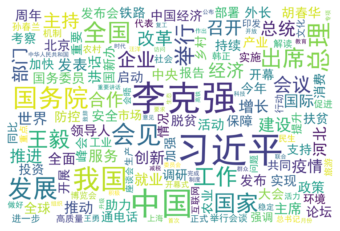

In [294]:
#绘制标题的词云图（前150个高频词）
my_cloud = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_title)
plt.imshow(my_cloud, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.show()

In [204]:
#dic_title_sorted=sorted(dic_title.items(),key=operator.itemgetter(1),reverse=True)

In [63]:
#词频统计:正文
dic_text={}
for i in range(len(text_cut_learn)):
    l=text_cut_learn[i]
    for word in l:
        if word not in dic_text:
            dic_text[word]=1
        else:
            dic_text[word]=dic_text[word]+1

In [301]:
#del dic_text['一个']

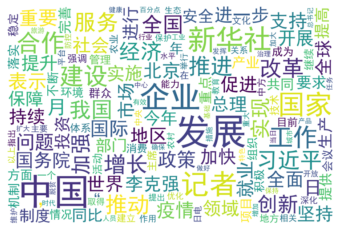

In [42]:
my_cloud1 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text)
plt.imshow(my_cloud1, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('text.jpg', bbox_inches='tight',dpi = 600)

In [241]:
#dic_text_sorted=sorted(dic_text.items(),key=operator.itemgetter(1),reverse=True)

In [312]:
#词频表格展示(总)
df_title=pd.DataFrame(dic_title_sorted)   #标题词频
df_title.columns=["标题词汇","词频"]
df_text=pd.DataFrame(dic_text_sorted)   #正文词频
df_text.columns=["正文词汇","词频"]

In [380]:
df_text.to_excel(r'C:\\Users\\X1\\Desktop\\正文词频.xlsx')

In [24]:
#高频词表
df_title.head(100)
df_text.head(100)

NameError: name 'df_title' is not defined

In [378]:
df_title.head(20)

,标题词汇,词频
0,习近平,3427
1,李克强,3239
2,中国,2612
3,我国,1887
4,发展,1579
5,总理,1578
6,国务院,1567
7,会见,1522
8,全国,1414
9,出席,1212


In [25]:
#低频词表
df_title.tail(100)
df_text.tail(10)

NameError: name 'df_title' is not defined

In [342]:
#中频词表
df_text.loc[1500:47580]

,正文词汇,词频
1500,一项,1205
1501,首届,1205
1502,对象,1203
1503,货币,1203
1504,造福,1202
...,...,...
47576,林光,9
47577,需求方,9
47578,南部非洲,9
47579,装卸工,9


In [254]:
#出现500次以上的词定义为高频词
title_gaopin=[]
for i in range(100):
    title_gaopin.append(dic_title_sorted[i][0])

title_counts = collections.Counter(dic_title)
title_counts_top100 = title_counts.most_common(100)
title_counts_top100
title_counts

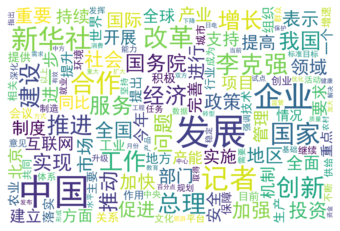

In [66]:
#绘制各年份要闻的词云图
text_2016=text_cut_learn[29076:32791]
dic_text_2016={}
for i in range(len(text_2016)):
    l=text_2016[i]
    for word in l:
        if word not in dic_text_2016:
            dic_text_2016[word]=1
        else:
            dic_text_2016[word]=dic_text_2016[word]+1
#dic_text_2016
my_cloud2016 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text_2016)
plt.imshow(my_cloud2016, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('2016.jpg', bbox_inches='tight',dpi = 600)

In [48]:
del dic_text_2016["“"]

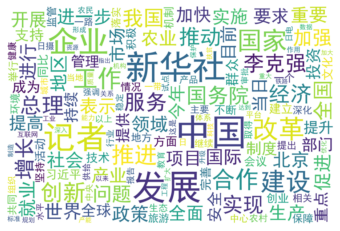

In [67]:
#绘制各年份要闻的词云图
text_2017=text_cut_learn[23615:29075]
dic_text_2017={}
for i in range(len(text_2017)):
    l=text_2017[i]
    for word in l:
        if word not in dic_text_2017:
            dic_text_2017[word]=1
        else:
            dic_text_2017[word]=dic_text_2017[word]+1
#dic_text_2016
my_cloud2017 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text_2017)
plt.imshow(my_cloud2017, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('2017.jpg', bbox_inches='tight',dpi = 600)

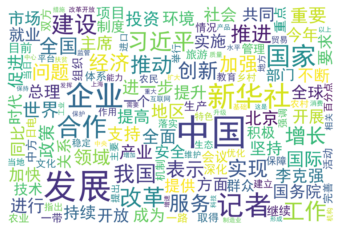

In [68]:
#绘制各年份要闻的词云图
text_2018=text_cut_learn[16327:23614]
dic_text_2018={}
for i in range(len(text_2018)):
    l=text_2018[i]
    for word in l:
        if word not in dic_text_2018:
            dic_text_2018[word]=1
        else:
            dic_text_2018[word]=dic_text_2018[word]+1
#dic_text_2016
my_cloud2018 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text_2018)
plt.imshow(my_cloud2018, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('2018.jpg', bbox_inches='tight',dpi = 600)

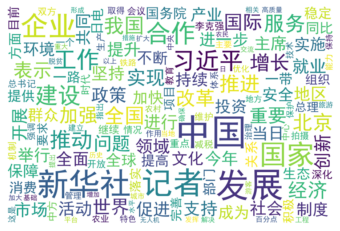

In [69]:
#绘制各年份要闻的词云图
text_2019=text_cut_learn[9081:16326]
dic_text_2019={}
for i in range(len(text_2019)):
    l=text_2019[i]
    for word in l:
        if word not in dic_text_2019:
            dic_text_2019[word]=1
        else:
            dic_text_2019[word]=dic_text_2019[word]+1
#dic_text_2016
my_cloud2019 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text_2019)
plt.imshow(my_cloud2019, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('2019.jpg', bbox_inches='tight',dpi = 600)

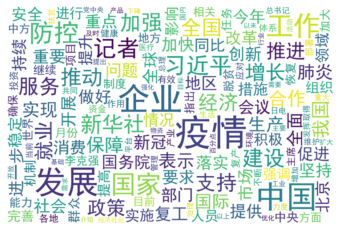

In [70]:
#绘制各年份要闻的词云图
text_2020=text_cut_learn[4209:9080]
dic_text_2020={}
for i in range(len(text_2020)):
    l=text_2020[i]
    for word in l:
        if word not in dic_text_2020:
            dic_text_2020[word]=1
        else:
            dic_text_2020[word]=dic_text_2020[word]+1
#dic_text_2016
my_cloud2020 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text_2020)
plt.imshow(my_cloud2020, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('2020.jpg', bbox_inches='tight',dpi = 600)

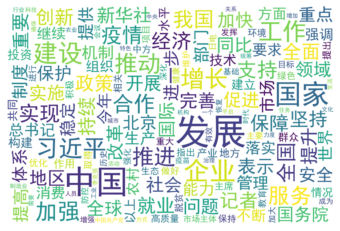

In [71]:
#绘制各年份要闻的词云图
text_2021=text_cut_learn[0:4208]
dic_text_2021={}
for i in range(len(text_2021)):
    l=text_2021[i]
    for word in l:
        if word not in dic_text_2021:
            dic_text_2021[word]=1
        else:
            dic_text_2021[word]=dic_text_2021[word]+1
#dic_text_2016
my_cloud2021 = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=150,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=150           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(dic_text_2021)
plt.imshow(my_cloud2021, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('2021.jpg', bbox_inches='tight',dpi = 600)

In [72]:
#对比各年份出现的高频词
dic_text_sorted_2016=sorted(dic_text_2016.items(),key=operator.itemgetter(1),reverse=True)
dic_text_sorted_2017=sorted(dic_text_2017.items(),key=operator.itemgetter(1),reverse=True)
dic_text_sorted_2018=sorted(dic_text_2018.items(),key=operator.itemgetter(1),reverse=True)
dic_text_sorted_2019=sorted(dic_text_2019.items(),key=operator.itemgetter(1),reverse=True)
dic_text_sorted_2020=sorted(dic_text_2020.items(),key=operator.itemgetter(1),reverse=True)
dic_text_sorted_2021=sorted(dic_text_2021.items(),key=operator.itemgetter(1),reverse=True)
df1=pd.DataFrame(dic_text_sorted_2016).head(20)[0]
df2=pd.DataFrame(dic_text_sorted_2017).head(20)[0]
df3=pd.DataFrame(dic_text_sorted_2018).head(20)[0]
df4=pd.DataFrame(dic_text_sorted_2019).head(20)[0]
df5=pd.DataFrame(dic_text_sorted_2020).head(20)[0]
df6=pd.DataFrame(dic_text_sorted_2021).head(20)[0]

In [2]:
del dic_text_2020['']

NameError: name 'dic_text_2020' is not defined

In [73]:
dic11 = {"2016": pd.Series(df1), 
       "2017": pd.Series(df2),
       "2018":pd.Series(df3),
       "2019":pd.Series(df4),
       "2020":pd.Series(df5),
       "2021":pd.Series(df6)}
df11=pd.DataFrame(dic11)

,2016,2017,2018,2019,2020,2021
0,发展,中国,中国,中国,疫情,发展
1,中国,发展,发展,发展,发展,中国
2,企业,新华社,企业,新华社,企业,国家
3,记者,记者,新华社,记者,中国,企业
4,新华社,企业,记者,企业,工作,建设
5,合作,改革,合作,国家,国家,增长
6,国家,建设,国家,合作,防控,习近平
7,改革,国家,建设,习近平,记者,工作
8,李克强,工作,习近平,工作,习近平,推动
9,总理,合作,改革,建设,新华社,加强


In [ ]:
df